In [2]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,atomic_number,radius_pm,oxid_state,relativistic,metal_amount_mmol,num of group,spcaer,...,aromaticity1,sol1_vol_mL,protic2,polarity index 2,aromaticity2,solv2_vol_mL,time_min,temp_c,size_nm,g_factor*10^4
0,0,0,0,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,3.060000,0.000000
1,1,1,1,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.104117,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,1.000000,0.757989
2,2,2,2,-1.03686,-0.252283,-0.853143,-1.110555,1.601355,0.049297,-0.526910,...,-0.070711,-0.175747,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,1.000000,0.583069
3,3,3,3,-1.03686,-0.252283,-0.853143,-1.110555,1.768534,-0.280991,-0.526910,...,-0.070711,-0.032487,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,2.370000,0.000000
4,4,4,4,0.90070,-0.626518,0.980887,0.900450,-0.454943,0.049297,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,4.000000,15.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1.03686,-0.252283,-0.853143,-1.110555,-0.265474,-0.115847,-0.742392,...,-0.070711,-0.605526,-0.537086,-0.793018,-0.240613,-0.523310,0.217328,-0.176375,2.066667,2.000000
197,197,197,197,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,15.000000
198,198,198,198,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.300000,10.000000
199,199,199,199,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,7.000000


In [4]:
FeatureMatrix = ['atomic_number','oxid_state','radius_pm','relativistic','metal_amount_mmol','num of group','spcaer','anchoring_group','chirality type','hydrogen bond','aromaticity','ligand_amount_mmol','redu_num','reductant_amount_mmol','protic1','polarity index1','aromaticity1','protic2','polarity index 2','aromaticity2','sol1_vol_mL','solv2_vol_mL','time_min','temp_c']

Output = ['size_nm', 'g_factor*10^4']

FeatureMatrix_and_outputs = ['atomic_number','oxid_state','radius_pm','relativistic','metal_amount_mmol','num of group','spcaer','anchoring_group','chirality type','hydrogen bond','aromaticity','ligand_amount_mmol','redu_num','reductant_amount_mmol','protic1','polarity index1','aromaticity1','protic2','polarity index 2','aromaticity2','sol1_vol_mL','solv2_vol_mL','time_min','temp_c','size_nm', 'g_factor*10^4']
df_corr = df[FeatureMatrix_and_outputs]
df_corr

,atomic_number,oxid_state,radius_pm,relativistic,metal_amount_mmol,num of group,spcaer,anchoring_group,chirality type,hydrogen bond,...,aromaticity1,protic2,polarity index 2,aromaticity2,sol1_vol_mL,solv2_vol_mL,time_min,temp_c,size_nm,g_factor*10^4
0,0.90070,0.980887,-0.626518,0.900450,-0.454943,-0.280991,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.124583,-0.523310,0.680663,-0.997007,3.060000,0.000000
1,0.90070,0.980887,-0.626518,0.900450,-0.454943,-0.280991,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.104117,-0.523310,0.680663,-0.997007,1.000000,0.757989
2,-1.03686,-0.853143,-0.252283,-1.110555,1.601355,0.049297,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.175747,-0.523310,-0.593509,-0.997007,1.000000,0.583069
3,-1.03686,-0.853143,-0.252283,-1.110555,1.768534,-0.280991,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.032487,-0.523310,-0.593509,-0.997007,2.370000,0.000000
4,0.90070,0.980887,-0.626518,0.900450,-0.454943,0.049297,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.124583,-0.523310,0.680663,-0.997007,4.000000,15.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.03686,-0.853143,-0.252283,-1.110555,-0.265474,-0.115847,-0.742392,-0.803389,0.120568,-0.956183,...,-0.070711,-0.537086,-0.793018,-0.240613,-0.605526,-0.523310,0.217328,-0.176375,2.066667,2.000000
197,-1.03686,-0.853143,-0.252283,-1.110555,0.570420,-0.115847,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,1.861899,1.679991,-0.240613,-0.175747,-0.004855,-0.535592,-0.176375,1.050000,15.000000
198,-1.03686,-0.853143,-0.252283,-1.110555,0.570420,-0.115847,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,1.861899,1.679991,-0.240613,-0.175747,-0.004855,-0.535592,-0.176375,1.300000,10.000000
199,-1.03686,-0.853143,-0.252283,-1.110555,0.570420,-0.115847,-0.526910,-0.803389,0.120568,1.045825,...,-0.070711,1.861899,1.679991,-0.240613,-0.175747,-0.004855,-0.535592,-0.176375,1.050000,7.000000


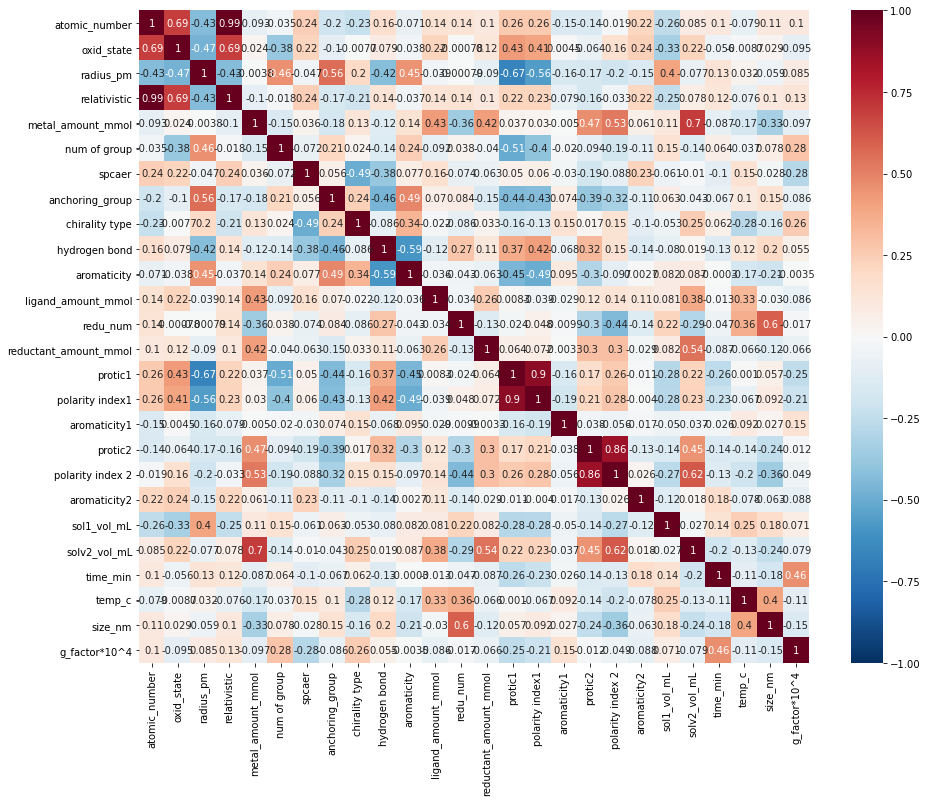

<Figure size 432x288 with 0 Axes>

In [5]:
X_cor = df[FeatureMatrix]  #Feature Matrix
y_cor = df[Output]          #Target Variable

#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = df_corr.corr()
fig = sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu_r,vmin=-1,vmax=1)
plt.show()
plt.savefig('Pearson.svg',format='svg',dpi=150)